In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.models import Sequential
from sklearn import *
from sklearn.preprocessing import MinMaxScaler

###################Task 3###################
Part a


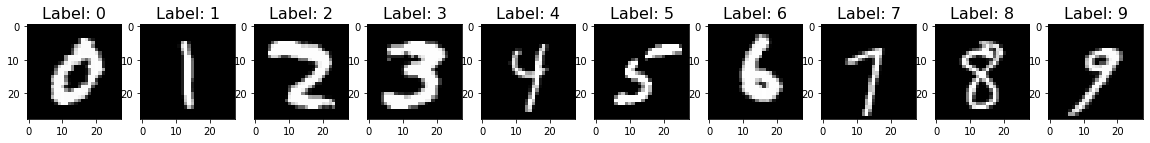

In [30]:
print("###################Task 3###################")

tf.random.set_seed(11)

print("Part a")

(x_train_03, y_train_03), (x_test_03, y_test_03) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# Visualize the data
f, ax = plt.subplots(1, 10, figsize=(20, 20))

for i in range(0, 10):
    sample = x_train_03[y_train_03 == i][3]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=16)

# plt.show()

# Scale the data
scaler = MinMaxScaler()
x_train_03 = scaler.fit_transform(x_train_03.reshape(-1, x_train_03.shape[-1])).reshape(x_train_03.shape)
x_test_03 = scaler.transform(x_test_03.reshape(-1, x_test_03.shape[-1])).reshape(x_test_03.shape)

In [31]:
print("Part b")
# Create Neural Network
model_b = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_b.fit(x_train_03, y_train_03, epochs=5)

# The training accuracy is 0.9649
val_loss_b, val_acc_b = model_b.evaluate(x_test_03, y_test_03)
print("Accuracy for test set:", val_acc_b)
# The test accuracy is 0.9621

Part b
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3641 - accuracy: 0.8980

In [32]:
print("Part c")
# Improve the model
model_c = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_c.fit(x_train_03, y_train_03, epochs=5)

# The training accuracy is 0.9870

val_loss_c, val_acc_c = model_c.evaluate(x_test_03, y_test_03)
print("Accuracy for test set:", val_acc_c)

# The test accuracy is 0.9736
# The accuracy of the deeper model is more accurat than the other one
# On the other hand it needs more data and is much more slower

Part c
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2104 - accuracy: 0.9375   

In [34]:
print("Part d")


Part d


In [46]:
print("###################Task 4###################")
(x_train_04, y_train_04), (x_test_04, y_test_04) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

# Scale the data
scaler = MinMaxScaler()
x_train_04 = scaler.fit_transform(x_train_04.reshape(-1, x_train_04.shape[-1])).reshape(x_train_04.shape)
x_test_04 = scaler.transform(x_test_04.reshape(-1, x_test_04.shape[-1])).reshape(x_test_04.shape)

print("Part a and b")
# Improve the model
model_4a = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])
model_4a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4a.fit(x_train_04, y_train_04, epochs=5)

# The training accuracy is 0.9858

val_loss_4, val_acc_4 = model_4a.evaluate(x_test_04, y_test_04)
print("Accuracy for test set:", val_acc_4)

# The test accuracy is 0.9767
# The dropout rate defines how many neurons are eliminated in each layer
# With dropout in a nn overfitting can be minimized

###################Task 4###################
Part a and b
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2550 - accuracy: 0.9240

In [50]:
print("Part c")
model_4c = Sequential([
    Flatten(input_shape=(28, 28)),
    BatchNormalization(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])
model_4c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4c.fit(x_train_04, y_train_04, epochs=5)

# The training accuracy is 0.9733

val_loss_4c, val_acc_4c = model_4c.evaluate(x_test_04, y_test_04)
print("Accuracy for test set:", val_acc_4c)
# The test accuracy with BatchNormalization is 0.9732

# Batch normalization applies a transformation that maintains the mean output
# close to 0 and the output standard deviation close to 1

Part c
Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2857 - accuracy: 0.9134